# Mean and standard deviation

**Problem 3a.** In this problem we look at the mean and the standard deviation from a more statistical point of view.
 * Generate $N=1\,000$ values $x_1,\ldots,x_n$ from Poisson($\lambda$) distribution for $\lambda=10$. You might want to use the function **poisson(lambda,shape)** from package **numpy.random**.
 * Plot a histogram of these values. What is the mean of Poisson($\lambda$)? What is the standard deviation? Are these values a good description of what you see in the histogram?
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. Plot the values of $\bar{x}_i$.
 * On the same figure, plot a horizontal line corresponding to the expected value ($\lambda$) of all those averages.
 * Compute (analitically) the standard deviation $\sigma_i$ of the $i$-th average and plot lines $\lambda \pm \sigma_i$, again on the same figure.
 * Does the standard deviation accurately describe the *typical* deviations?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lamda = 10
sampleCount = 1000

arr = np.random.poisson(lamda, sampleCount)

su = 0
mean = []

for i in np.arange(sampleCount):
    su += arr[i]
    mean.append(su / (i+1))
    

mean

# plt.hist(arr, bins=np.arange(np.max(arr)))  # arguments are passed to np.histogram
# plt.show()

plt.hist(mean, bins=np.arange(sampleCount))
plt.show()

**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

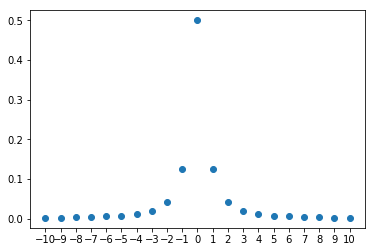

[-2. -0. -2. ...,  1. -5. -1.]


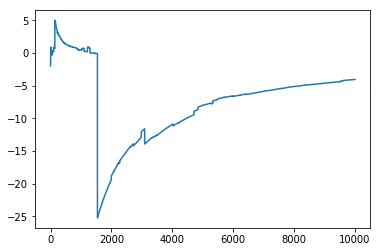

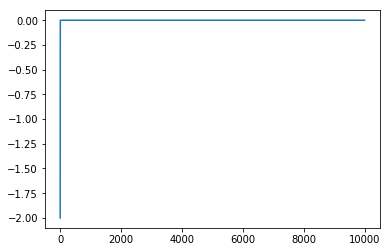

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# PLOT FUNCTION
x = np.arange(-10, 11, 1)
r = np.arange(1, 11, 1);
val = 1 / (r * 4 * (r + 1))
y = np.hstack(( val[::-1], [1/2], val )).ravel() # concatenate three lists (including reversed [val] list)

plt.plot(x, y, 'o')
plt.xticks(x)
plt.show()


# GET SAMPLES WITH APPROPRIATE DISTRIBUTION
    
size = 10000
def samples(s):
    zeroes = np.random.randint(2, size=s)
    sign = (np.random.randint(2, size=s) * 2) - 1
    rands = np.random.rand(s)
    distr = np.ceil(-(rands / (rands - 1)))
    return distr * zeroes * sign


# PLOT PARTIAL AVERAGES

put = samples(size)
print(put)
avg = np.cumsum(put) / (np.arange(size)+1)

plt.plot(avg)
plt.show()


# PLOT PARTIAL MEDIANS

a = []
v = []
for i in np.arange(size):
    a = np.append(a, put[i])
    v = np.append(v, np.median(a))
    
plt.plot(v)
plt.show()

**Problem 3c.** We are now going to investigate an intermediate case - a variable with a finite mean, but no variance. Consider a discrete variable $Y$ with the following distribution: $P(Y=k) = \frac{1}{|k|(|k|+1)(|k|+2)}$ for $k \neq 0$ and $P(Y=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $EY=0$, but $Y$ has no variation (i.e. the defining series is not absolutely convergent).
 * Plot the function $f(k) = P(Y=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $Y$'s distribution.
 * Generate $N=10\,000$ values $y_1,\ldots,y_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{y}_i = \frac{y_1+\ldots+y_i}{i}$. 
 * Plot the values of $\bar{y}_i$. Does it look like the series converges?
 * For $i \in \{1,\ldots,n\}$ compute $\hat{y}_i = \textrm{ median of }\{y_1,\ldots,y_i\}$.
 * Plot the values of $\hat{y}_i$.
 * Discuss the results obtained.